<a href="https://colab.research.google.com/github/NithyaPKiran/Assignments/blob/main/Assignment_11_Text_Mining_2_Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEXT MINING

PROBLEM STATEMENT:

1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining



In [1]:
#Import the Libraries

In [2]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [3]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [4]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html',
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [7]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-7-2e47bb25bda7>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [8]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nGood,Nice product but Betrry is not good,1 April 2024
3,5.0,5.0 out of 5 stars\nNice products,Good,8 April 2024
4,4.0,4.0 out of 5 stars\nGood phone-could have been...,I've purchased the 6GB version of this phone w...,19 December 2022
...,...,...,...,...
95,3.0,3.0 out of 5 stars\nHeats up too early.,Used camera for more than 10 mins and it heats...,19 February 2024
96,5.0,5.0 out of 5 stars\nA good choice for upgrade,Nord CE 2 is a decent choice for someone looki...,27 February 2022
97,4.0,4.0 out of 5 stars\nExcellent,Super phone smooth perfomance good canera qual...,26 December 2023
98,3.0,3.0 out of 5 stars\nAVERAGE PHONE,AVERAGE PHONE,27 February 2024


In [9]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

In [11]:
#for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [13]:
# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


In [14]:
# load the dataset
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17 March 2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26 February 2022
2,5.0,5.0 out of 5 stars\nGood,Nice product but Betrry is not good,1 April 2024
3,5.0,5.0 out of 5 stars\nNice products,Good,8 April 2024
4,4.0,4.0 out of 5 stars\nGood phone-could have been...,I've purchased the 6GB version of this phone w...,19 December 2022
...,...,...,...,...
95,3.0,3.0 out of 5 stars\nHeats up too early.,Used camera for more than 10 mins and it heats...,19 February 2024
96,5.0,5.0 out of 5 stars\nA good choice for upgrade,Nord CE 2 is a decent choice for someone looki...,27 February 2022
97,4.0,4.0 out of 5 stars\nExcellent,Super phone smooth perfomance good canera qual...,26 December 2023
98,3.0,3.0 out of 5 stars\nAVERAGE PHONE,AVERAGE PHONE,27 February 2024


In [15]:
reviews.Rating.describe()

count    100.000000
mean       4.210000
std        0.655898
min        3.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Rating, dtype: float64

In [16]:
#Number of Words
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,Its a value for money phone. it never disappo...,34
1,The media could not be loaded.\n ...,559
2,Nice product but Betrry is not good,7
3,Good,1
4,I've purchased the 6GB version of this phone w...,299


In [17]:
#Number of characters
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,Its a value for money phone. it never disappo...,170.0
1,The media could not be loaded.\n ...,2791.0
2,Nice product but Betrry is not good,35.0
3,Good,4.0
4,I've purchased the 6GB version of this phone w...,1715.0


In [18]:
#Average Word Length
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,Its a value for money phone. it never disappo...,4.281250
1,The media could not be loaded.\n ...,4.133581
2,Nice product but Betrry is not good,4.142857
3,Good,4.000000
4,I've purchased the 6GB version of this phone w...,4.755034


In [19]:
#Number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,Its a value for money phone. it never disappo...,7
1,The media could not be loaded.\n ...,214
2,Nice product but Betrry is not good,3
3,Good,0
4,I've purchased the 6GB version of this phone w...,128


In [20]:
#Number of special characters
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,Its a value for money phone. it never disappo...,0
1,The media could not be loaded.\n ...,0
2,Nice product but Betrry is not good,0
3,Good,0
4,I've purchased the 6GB version of this phone w...,0


In [21]:
#Number of numerics
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,Its a value for money phone. it never disappo...,0
1,The media could not be loaded.\n ...,20
2,Nice product but Betrry is not good,0
3,Good,0
4,I've purchased the 6GB version of this phone w...,2


In [22]:
#Number of Uppercase words
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,Its a value for money phone. it never disappo...,2
1,The media could not be loaded.\n ...,8
2,Nice product but Betrry is not good,0
3,Good,0
4,I've purchased the 6GB version of this phone w...,4


In [23]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [24]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Its a value for money  phone. it never disappo...
1    The media could not be loaded.\n              ...
2                   Vice product but Merry is not good
3                                                 Good
4    I've purchased the 6GB version of this phone w...
Name: Review, dtype: object

In [25]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0     17
1     26
2      1
3      8
4     19
      ..
95    19
96    27
97    26
98    27
99    29
Name: Review_Date, Length: 100, dtype: object 
 0        March
1     February
2        April
3        April
4     December
        ...   
95    February
96    February
97    December
98    February
99    February
Name: Review_Date, Length: 100, dtype: object 
 0     2024
1     2022
2     2024
3     2024
4     2022
      ... 
95    2024
96    2022
97    2023
98    2024
99    2024
Name: Review_Date, Length: 100, dtype: object


In [26]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,17,March,2024
1,26,February,2022
2,1,April,2024
3,8,April,2024
4,19,December,2022
...,...,...,...
95,19,February,2024
96,27,February,2022
97,26,December,2023
98,27,February,2024


In [27]:
df.Month.value_counts()

Month
March       29
January     25
February    22
April       15
December     7
October      1
November     1
Name: count, dtype: int64

In [28]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,3
1,2
2,4
3,4
4,December
...,...
95,2
96,2
97,December
98,2


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       100 non-null    float64
 1   Title        100 non-null    object 
 2   Review       99 non-null     object 
 3   Review_Date  100 non-null    object 
 4   Date         100 non-null    object 
 5   Month        100 non-null    object 
 6   Year         100 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [30]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,5.0,5.0 out of 5 stars\nValue for money,Its a value for money phone. it never disappo...,17,3,2024
1,4.0,4.0 out of 5 stars\nA decent package for non g...,The media could not be loaded.\n ...,26,2,2022
2,5.0,5.0 out of 5 stars\nGood,Nice product but Betrry is not good,1,4,2024
3,5.0,5.0 out of 5 stars\nNice products,Good,8,4,2024
4,4.0,4.0 out of 5 stars\nGood phone-could have been...,I've purchased the 6GB version of this phone w...,19,December,2022


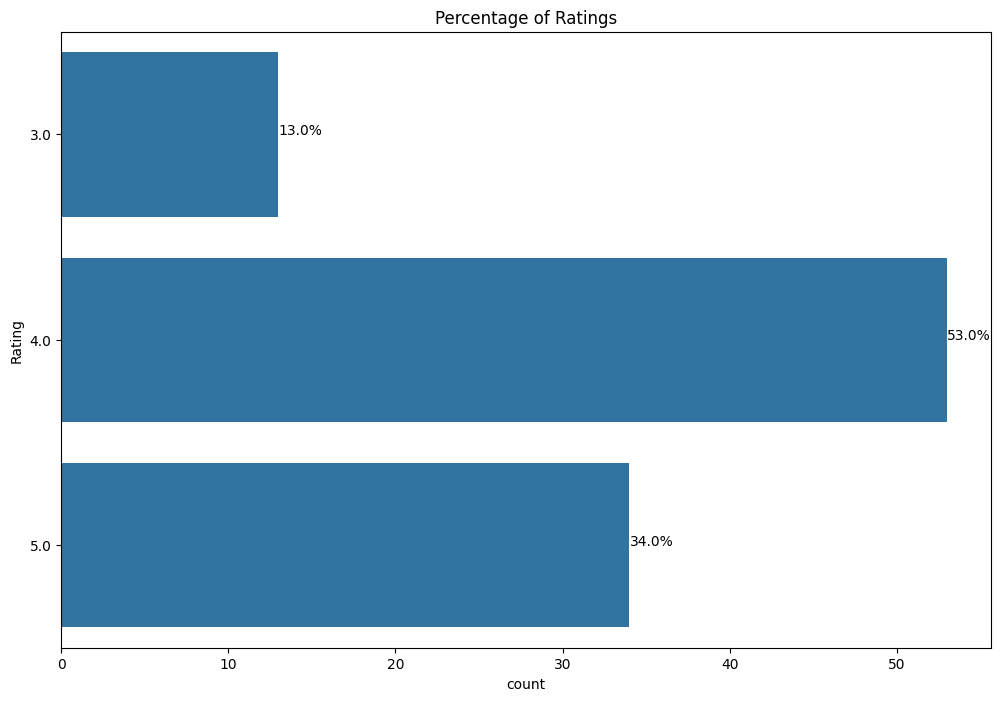

In [31]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [32]:
data = df[['Review']]
data

,Review
0,Its a value for money phone. it never disappo...
1,The media could not be loaded.\n ...
2,Nice product but Betrry is not good
3,Good
4,I've purchased the 6GB version of this phone w...
...,...
95,Used camera for more than 10 mins and it heats...
96,Nord CE 2 is a decent choice for someone looki...
97,Super phone smooth perfomance good canera qual...
98,AVERAGE PHONE


In [33]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [34]:
data

,Review
0,its value money phone. never disappointed me. ...
1,the media could loaded. build quality - rating...
2,nice product betrry good
3,good
4,i've purchased 6gb version phone comes extenda...
...,...
95,used camera 10 mins heats much
96,nord ce 2 decent choice someone looking upgrad...
97,super phone smooth perfomance good canera qual...
98,average phone


In [35]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/100 [00:00<?, ?it/s]

In [36]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,nice product betrry good,Nice product but Betrry is not good
3,good,Good
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...


In [37]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [38]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,nice product betrry good,Nice product but Betrry is not good
3,good,Good
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
5,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
6,bought phone day ago everything looking great ...,I bought this phone 4 days ago . Everything is...
7,nan,NaN
8,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
9,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...


In [39]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,nice product betrry good,Nice product but Betrry is not good
3,good,Good
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
5,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
6,bought phone day ago everything looking great ...,I bought this phone 4 days ago . Everything is...
7,nan,NaN
8,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
9,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...


In [40]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,nice product betrry good,Nice product but Betrry is not good
3,good,Good
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
5,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
6,bought phone day ago everything looking great ...,I bought this phone 4 days ago . Everything is...
7,nan,NaN
8,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
9,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...


In [41]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,nice product betrry good,Nice product but Betrry is not good
3,good,Good
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
5,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
6,bought phone day ago everything looking great ...,I bought this phone 4 days ago . Everything is...
7,nan,NaN
8,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
9,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...


In [42]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,nice product betrry good,Nice product but Betrry is not good
3,good,Good
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
5,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
6,bought phone day ago everything looking great ...,I bought this phone 4 days ago . Everything is...
7,nan,NaN
8,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
9,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...


In [43]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [44]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,nice product betrry good,Nice product but Betrry is not good
3,good,Good
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
5,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
6,bought phone day ago everything looking great ...,I bought this phone 4 days ago . Everything is...
7,nan,NaN
8,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
9,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...


In [45]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [46]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,nice product betrry good,Nice product but Betrry is not good
3,good,Good
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
5,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
6,bought phone day ago everything looking great ...,I bought this phone 4 days ago . Everything is...
7,nan,NaN
8,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
9,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...


In [47]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...,"[value, money, phone, never, disappointed, bes..."
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,"[medium, could, loaded, build, quality, rating..."
2,nice product betrry good,Nice product but Betrry is not good,"[nice, product, betrry, good]"
3,good,Good,[good]
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,"[purchased, gb, version, phone, come, extendab..."
5,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...,"[camera, setup, nord, ce, versatile, offering,..."
6,bought phone day ago everything looking great ...,I bought this phone 4 days ago . Everything is...,"[bought, phone, day, ago, everything, looking,..."
7,nan,NaN,[nan]
8,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...,"[recently, purchased, oneplus, nord, ce, lite,..."
9,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...,"[using, phone, month, suppose, giving, good, s..."


In [48]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [50]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [51]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [52]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...
2,nice product betrry good,Nice product but Betrry is not good
3,good,Good
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
5,camera setup nord ce versatile offering variet...,The camera setup on the Nord CE 2 is versatile...
6,bought phone day ago everything looking great ...,I bought this phone 4 days ago . Everything is...
7,nan,NaN
8,recently purchased oneplus nord ce lite g stun...,I recently purchased the OnePlus Nord CE 2 Lit...
9,using phone month suppose giving good service ...,I have been using this phone for 6 months I su...


In [53]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'build', 'quality', 'rating', 'one', 'light', 'weight', 'phone', 'say', 'quite', 'comfortable', 'one', 'hand', 'usage', 'even', 'material', 'used', 'polycarbonate', 'get', 'job', 'done', 'matter', 'back', 'cover', 'term', 'styling', 'similar', 'oppo', 'phone', 'liked', 'recommend', 'gray', 'one', 'attache', 'fingerprint', 'going', 'use', 'back', 'cover', 'matterdisplay', 'rating', 'really', 'good', 'amoled', 'plan', 'hz', 'refresh', 'rate', 'work', 'well', 'wish', 'could', 'hz', 'bottom', 'chin', 'quite', 'thick', 'thing', 'yes', 'gorilla', 'glass', 'protection', 'screen', 'guard', 'pre', 'applied', 'panel', 'one', 'best', 'pretty', 'decent', 'wellperformance', 'rating', 'dimensity', 'ufs', 'lppdr', 'x', 'ram', 'get', 'job', 'done', 'regular', 'day', 'day', 'operation', 'played', 'game', 'say', 'considering', 'soc', 'pretty', 'good', 'expect', 'fps', 'stable', 'bgmi', 'cod', 'still', 'would', 'say', 'processor', 'good', 'competition', 'offering', 

In [54]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [value, money, phone, never, disappointed, bes...
1    [medium, could, loaded, build, quality, rating...
2                        [nice, product, betrry, good]
3                                               [good]
4    [purchased, gb, version, phone, come, extendab...
5    [camera, setup, nord, ce, versatile, offering,...
6    [bought, phone, day, ago, everything, looking,...
7                                                [nan]
8    [recently, purchased, oneplus, nord, ce, lite,...
9    [using, phone, month, suppose, giving, good, s...
Name: Clean_Reviews, dtype: object

In [55]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [56]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,valu money phone never disappoint best charg s...
1,medium could load build qualiti rate one light...
2,nice product betrri good
3,good
4,purchas gb version phone come extend gb ram vi...
...,...
94,use camera min heat much
95,nord ce decent choic someon look upgrad k segm...
96,super phone smooth perfom good canera qualiti ...
97,averag phone


In [57]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,stemmed
0,value money phone never disappointed best char...
1,medium could loaded build quality rating one l...
2,nice product betrry good
3,good
4,purchased gb version phone come extendable gb ...
...,...
94,used camera min heat much
95,nord ce decent choice someone looking upgrade ...
96,super phone smooth perfomance good canera qual...
97,average phone


In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [59]:
print(tweetscv.toarray()[100:200])

[]


In [60]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/99 [00:00<?, ?it/s]

In [61]:
corpus[3]

'good'

In [62]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [63]:
X.shape

(99, 3812)

In [64]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/99 [00:00<?, ?it/s]

In [65]:
corpus[4]

'purchas gb version phone come extend gb ram virtual memori capabl good phone least expens categori offer one plu small evid point get notic first thing confus placement power button henc finger sensor daili handl mobil phone feel bit annoy finger lock un lock phone tri handl place pocket although big problem still someth think second point lag notic bit hope might go away updat improv third point speaker volum speaker good near maximum level e volum seem creep steadili rather loud top volum limit fourth point final one camera shoot color realist photo taken day light especi skin tone tend colour led flash averag could better good awesom part phone practic daili user one plu strong brand part price offer batteri life good charg capabl also impress someon like move android phone build phone apt surviv normal fall mishap happen phone feel solid hand stock android clean noth complain overal clean phone small improv would make rounder cut rest keep one plu brand mind'

In [66]:
## TFidf Vectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [67]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'value money phone never disappointed best charging speed nice bettry life play pub g smooth extreme easily much heating issue medium could loaded build quality rating one light weight phone say quite comfortable one hand usage even material used polycarbonate get job done matter back cover term styling similar oppo phone liked recommend gray one attache fingerprint going use back cover matterdisplay rating really good amoled plan hz refresh rate work well wish could hz bottom chin quite thick thing yes gorilla glass protection screen guard pre applied panel one best pretty decent wellperformance rating dimensity ufs lppdr x ram get job done regular day day operation played game say considering soc pretty good expect fps stable bgmi cod still would say processor good competition offering better decide gaming matter next year last easily normal usagesoftware biggest con android based oxygen say future color oos overall quite stable bug still say lot wait android better ideacamera rating

In [68]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [69]:
for token in doc_block[:50]:
    print(token,token.pos_)

value NOUN
money NOUN
phone NOUN
never ADV
disappointed VERB
best ADV
charging VERB
speed NOUN
nice ADJ
bettry NOUN
life NOUN
play VERB
pub NOUN
g PROPN
smooth ADJ
extreme ADJ
easily ADV
much ADJ
heating NOUN
issue NOUN
medium NOUN
could AUX
loaded VERB
build VERB
quality NOUN
rating NOUN
one NUM
light ADJ
weight NOUN
phone NOUN
say VERB
quite ADV
comfortable ADJ
one NUM
hand NOUN
usage NOUN
even ADV
material NOUN
used VERB
polycarbonate NOUN
get NOUN
job NOUN
done VERB
matter NOUN
back ADV
cover NOUN
term NOUN
styling VERB
similar ADJ
oppo NOUN


In [70]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['done', 'camera', 'check', 'review', 'video', 'p', 'mp', 'ultratwide', 'camera', 'saying', 'others', 'offering', 'oneplus', 'managed', 'give', 'thingsbattery', 'rating', 'rate', 'percent', 'brightness', 'mode', 'excluding', 'gaming', 'give', 'hr', 'wifi', 'rest', 'remaining', 'wifi', 'battery', 'task', 'day', 'charging', 'take', 'minute', 'charge', 'percent', 'fastspeakers', 'speaker', 'quality', 'quality', 'rating', 'none', 'party', 'complained', 'voice', 'getting', 'conclude', 'buy', 'care', 'oneplus', 'want', 'try', 'oneplus', 'time', 'getting', 'price', 'rejected', 'miui', 'user', 'want', 'software', 'ad', 'notification', 'bloatwares', 'product', 'betrry', 'purchased', 'version', 'phone', 'come', 'gb', 'ram', 'memory', 'capability', 'phone', 'category', 'offering', 'point', 'noticed', 'thing', 'confusing', 'placement', 'power', 'button', 'sensor', 'handling', 'phone', 'feel', 'bit', 'finger', 'locking', 'locking', 'phone', 'try', 'handle', 'place', 'pocket', 'problem', 'think']


In [71]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,65
1,camera,28
2,battery,21
3,quality,19
4,day,14
5,product,14
6,user,13
7,feature,13
8,charging,11
9,oneplus,10


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

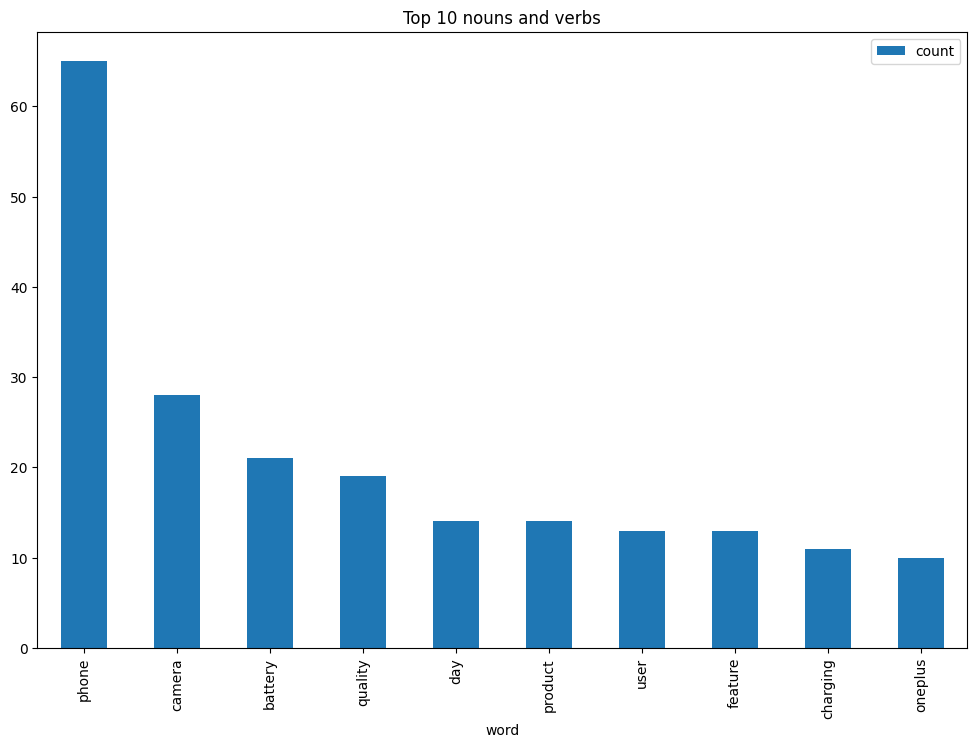

In [72]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [73]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [74]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [75]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,count
Clean_Reviews,
pos,92
neg,7


In [76]:
dataframe.Clean_Reviews[8]

'recently purchased oneplus nord ce lite g stunning blue tide color equipped gb ram gb storage overall experience positive notable strength speed feature sound quality price speed oneplus nord ce lite g impressive thanks gb ram multitasking breeze apps open run smoothly without noticeable lag device g capability add overall fast responsive user experience making great choice prioritize speed budget friendly phone term feature oneplus nord ce lite g disappoint come packed variety function enhance user experience device offer well rounded set feature cater casual user tech enthusiast alike sound quality oneplus nord ce lite g surprisingly good price point audio output clear loud making enjoyable medium consumption gaming call phone speaker system delivers satisfying audio experience adding value overall package however couple drawback might significant user firstly screen brightness overpowering causing discomfort user case particularly problematic dad prolonged usage led eye strain woul

In [77]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.059, 'neu': 0.669, 'pos': 0.273, 'compound': 0.9949}

In [78]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,value money phone never disappointed best char...,"{'neg': 0.116, 'neu': 0.449, 'pos': 0.434, 'co..."
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co..."
2,nice product betrry good,"{'neg': 0.0, 'neu': 0.26, 'pos': 0.74, 'compou..."
3,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
4,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co..."


In [79]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,value money phone never disappointed best char...,"{'neg': 0.116, 'neu': 0.449, 'pos': 0.434, 'co...",0.8012
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977
2,nice product betrry good,"{'neg': 0.0, 'neu': 0.26, 'pos': 0.74, 'compou...",0.6908
3,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404
4,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876


In [80]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,value money phone never disappointed best char...,"{'neg': 0.116, 'neu': 0.449, 'pos': 0.434, 'co...",0.8012,Positive
1,medium could loaded build quality rating one l...,"{'neg': 0.029, 'neu': 0.666, 'pos': 0.305, 'co...",0.9977,Positive
2,nice product betrry good,"{'neg': 0.0, 'neu': 0.26, 'pos': 0.74, 'compou...",0.6908,Positive
3,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
4,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876,Positive
...,...,...,...,...
94,used camera min heat much,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
95,nord ce decent choice someone looking upgrade ...,"{'neg': 0.028, 'neu': 0.75, 'pos': 0.222, 'com...",0.9956,Positive
96,super phone smooth perfomance good canera qual...,"{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'comp...",0.8934,Positive
97,average phone,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [81]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



<Axes: xlabel='sentiment', ylabel='count'>

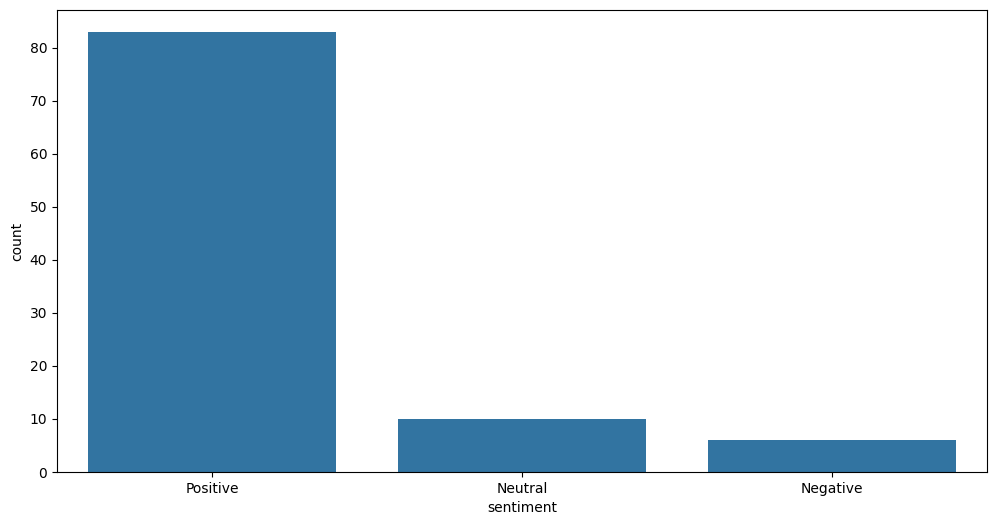

In [82]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<Axes: xlabel='sentiment', ylabel='count'>

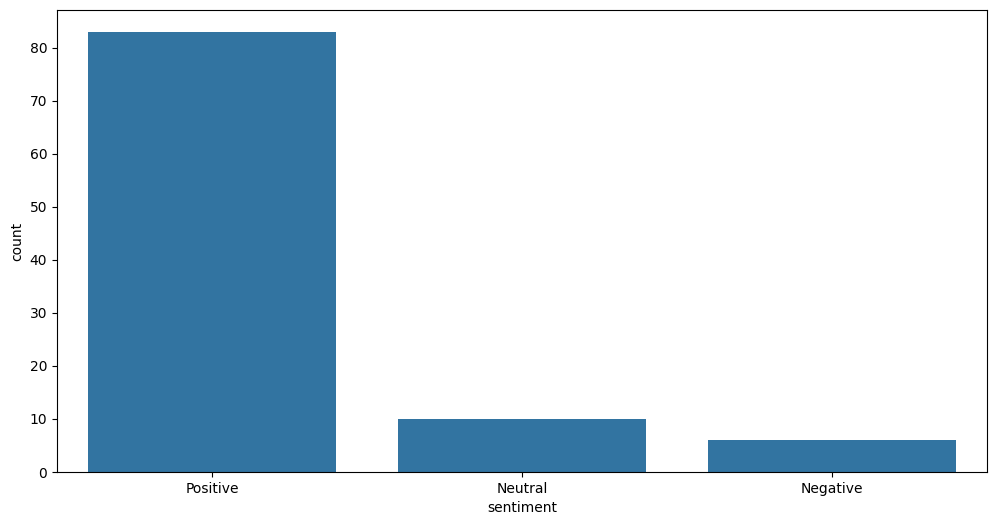

In [83]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [84]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,count
Clean_Reviews,
pos,92
neg,7


In [85]:
 # let's calculate subjectivity and Polarity
# function for subjectivity
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...,0.625000,0.408333
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,0.512212,0.213783
2,nice product betrry good,Nice product but Betrry is not good,0.800000,0.650000
3,good,Good,0.600000,0.700000
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556


Text(0, 0.5, 'Subjectivity')

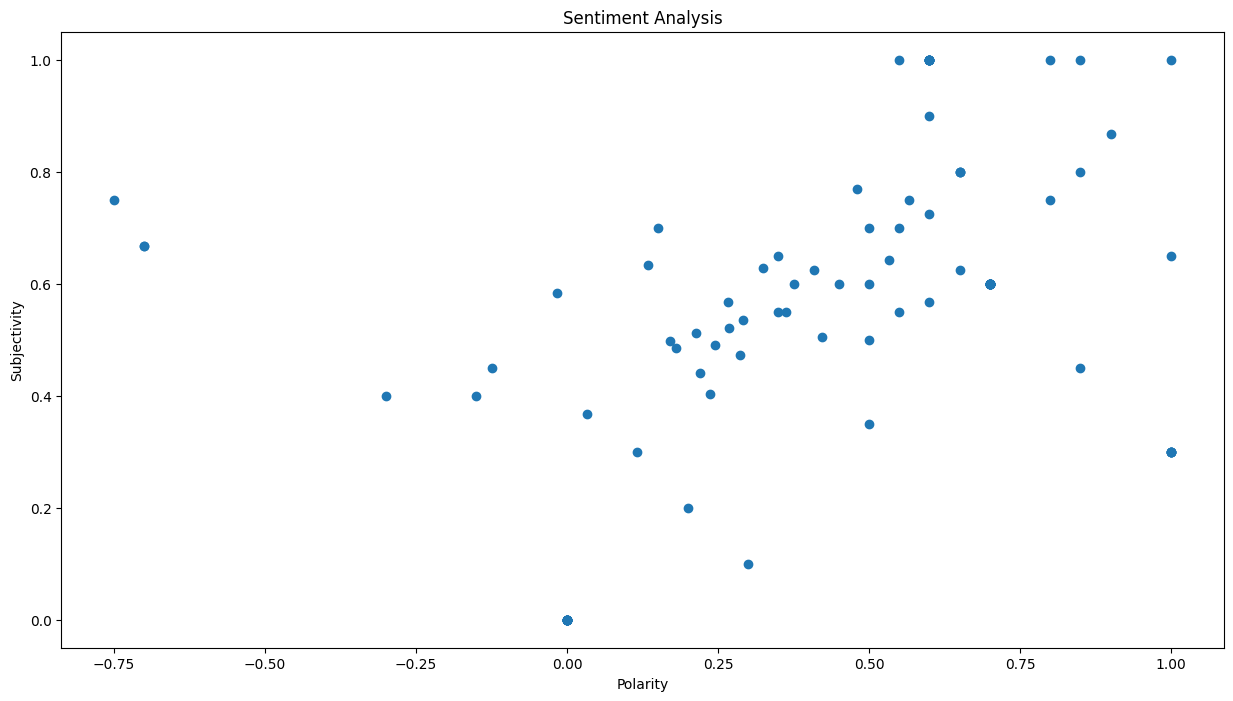

In [86]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [87]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,value money phone never disappointed best char...,Its a value for money phone. it never disappo...,0.625000,0.408333,pos
1,medium could loaded build quality rating one l...,The media could not be loaded.\n ...,0.512212,0.213783,pos
2,nice product betrry good,Nice product but Betrry is not good,0.800000,0.650000,pos
3,good,Good,0.600000,0.700000,pos
4,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556,pos


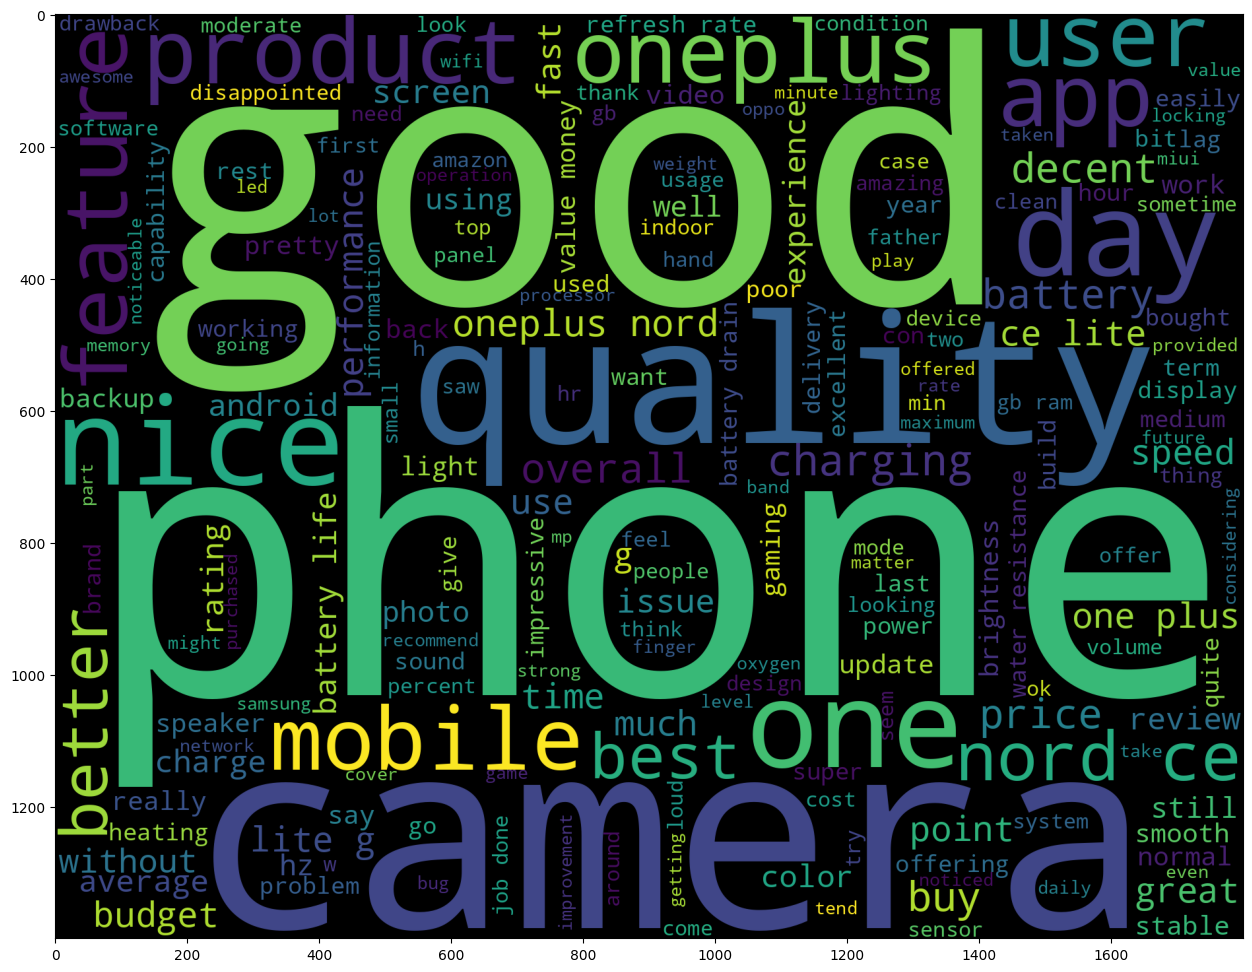

In [88]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [89]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

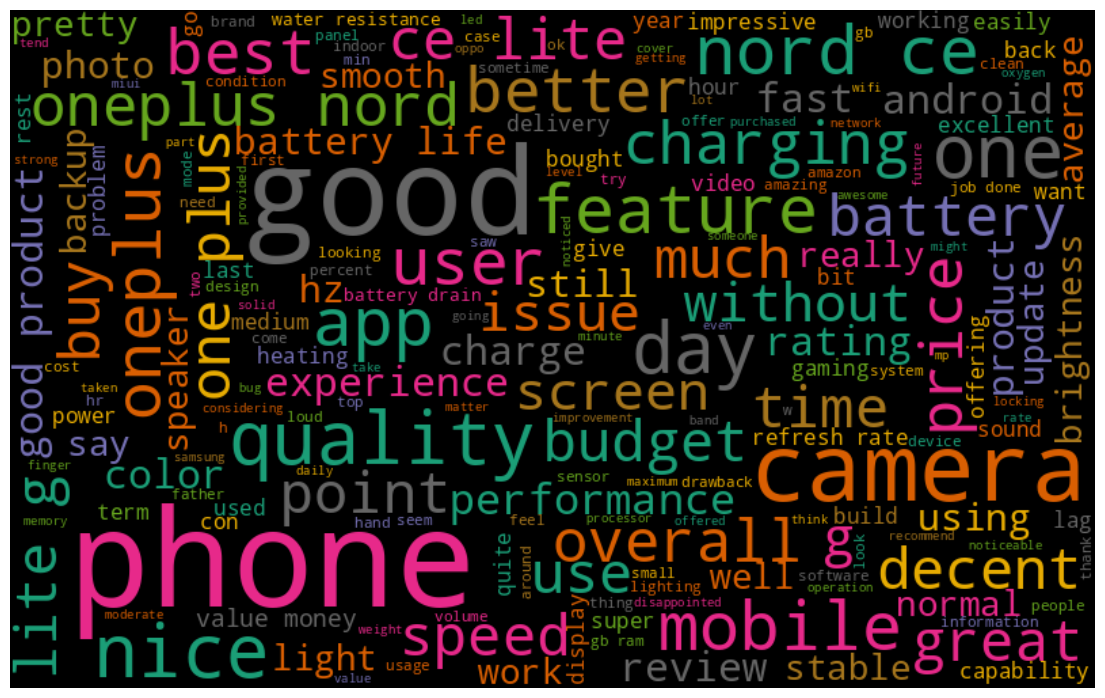

In [90]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)


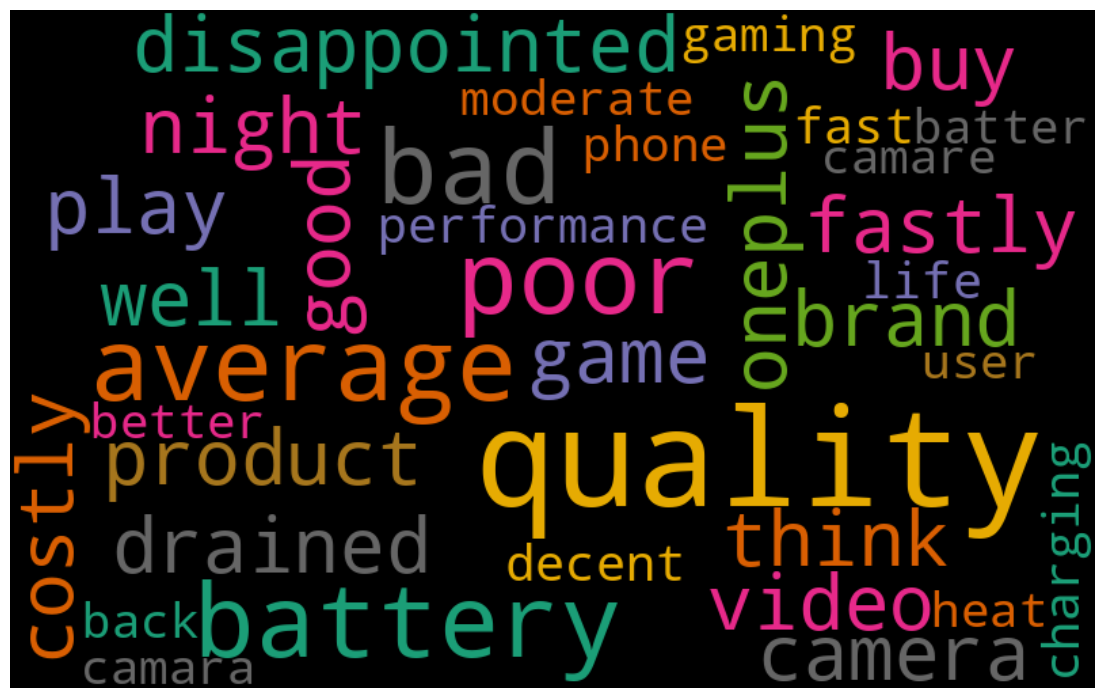

In [91]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)